In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json # Add this line to import the json module

url = "https://api-publica.datajud.cnj.jus.br/api_publica_tjsp/_search" # url do TJSP
api_key = "APIKey cDZHYzlZa0JadVREZDJCendQbXY6SkJlTzNjLV9TRENyQk1RdnFKZGRQdw==" # Chave pública

payload = json.dumps({
  "size": 10000,
  "query": {
    "match": {"classe.codigo": 12729}  # 12729 (Exec. de Med. Alternativas)
  },
  "sort": [{"dataAjuizamento": {"order": "desc"}}] # ou asc
})

headers = {
  'Authorization': api_key,
  'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload)  # <Response [200]>
dados_dict = response.json() # <class 'dict'>
print(len(dados_dict))

4


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
display(dados_dict['hits']['hits'][10]) # Exemplo

{'_index': 'api_publica_tjsp',
 '_type': '_doc',
 '_id': 'TJSP_G1_15006204920248260372',
 '_score': None,
 '_source': {'classe': {'codigo': 12729,
   'nome': 'Execução de Medidas Alternativas no Juízo Comum'},
  'numeroProcesso': '15006204920248260372',
  'sistema': {'codigo': -1, 'nome': 'Inválido'},
  'formato': {'codigo': 1, 'nome': 'Eletrônico'},
  'tribunal': 'TJSP',
  'dataHoraUltimaAtualizacao': '2024-07-19T17:57:03.248Z',
  'grau': 'G1',
  '@timestamp': '2024-07-20T02:26:44.232Z',
  'dataAjuizamento': '2024-06-27T09:53:35.000Z',
  'movimentos': [{'complementosTabelados': [{'codigo': 2,
      'valor': 2,
      'nome': 'sorteio',
      'descricao': 'tipo_de_distribuicao_redistribuicao'}],
    'codigo': 26,
    'nome': 'Distribuição',
    'dataHora': '2024-06-27T10:00:48.000Z'},
   {'complementosTabelados': [{'codigo': 4,
      'valor': 80,
      'nome': 'Outros documentos',
      'descricao': 'tipo_de_documento'}],
    'codigo': 581,
    'nome': 'Documento',
    'dataHora': '2024

In [ ]:
processos = []

for processo in dados_dict['hits']['hits']:
  numero_processo = processo['_source']['numeroProcesso']
  grau = processo['_source']['grau']
  classe = processo['_source']['classe']['nome']
  assuntos = processo['_source']['assuntos'] # Pode ter mais de um
  data_ajuizamento = processo['_source']['dataAjuizamento']
  ultima_atualizacao = processo['_source']['dataHoraUltimaAtualizacao']
  formato = processo['_source']['formato']['nome']
  codigo = processo['_source']['orgaoJulgador']['codigo']
  orgao_julgador = processo['_source']['orgaoJulgador']['nome']
  municipio = processo['_source']['orgaoJulgador'].get('codigoMunicipioIBGE')
  sort = processo['sort'][0]
  try:
    movimentos = processo['_source']['movimentos']
  except:
    movimentos = []

  processos.append([numero_processo, classe, data_ajuizamento, ultima_atualizacao, formato, \
                    codigo, orgao_julgador, municipio, grau, assuntos, movimentos, sort])

df = pd.DataFrame(processos, columns=['numero_processo', 'classe', 'data_ajuizamento', 'ultima_atualizacao', \
                      'formato', 'codigo', 'orgao_julgador', 'municipio', 'grau', 'assuntos', 'movimentos', 'sort'])

df.sample(5)

,numero_processo,classe,data_ajuizamento,ultima_atualizacao,formato,codigo,orgao_julgador,municipio,grau,assuntos,movimentos,sort
2980,10074375320238260266,Execução de Medidas Alternativas no Juízo Comum,2023-11-09T11:54:30.000Z,2024-07-19T19:01:37.634Z,Eletrônico,9713,02 CUMULATIVA DE ITANHAEM,NaN,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1699530870000
7752,10026652020238260566,Execução de Medidas Alternativas no Juízo Comum,2023-03-09T13:58:40.000Z,2024-07-19T10:32:27.679Z,Eletrônico,10326,03 CRIMINAL DE SAO CARLOS,NaN,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1678370320000
4712,10032558320238260505,Execução de Medidas Alternativas no Juízo Comum,2023-08-03T18:12:22.000Z,2024-07-19T17:59:19.327Z,Eletrônico,10164,02 CUMULATIVA DE RIBEIRAO PIRES,NaN,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1691086342000
9499,10039174520228260323,Execução de Medidas Alternativas no Juízo Comum,2022-11-11T11:44:38.000Z,2024-05-08T22:15:47.620Z,Eletrônico,17936,CRIMINAL DE LORENA,3527207.0,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1668167078000
6507,10015266720238260587,Execução de Medidas Alternativas no Juízo Comum,2023-05-09T09:08:01.000Z,2024-05-28T04:55:34.515Z,Eletrônico,13675,CRIMINAL DE SAO SEBASTIAO,3550704.0,G1,"[{'codigo': 15056, 'nome': 'Acordo de Não Pers...","[{'complementosTabelados': [{'codigo': 2, 'val...",1683623281000


In [ ]:
# Gravação dos arquivos

df.to_csv('ppni.csv', sep=',', header=True, index=False)

with open('movimentos_ppni.txt', 'w') as file:
    for index, row in df.iterrows():
        file.write(f"Autos n. {row['numero_processo']}, Classe: {row['classe']}\n")
        file.write(f"Ajuizamento: {row['data_ajuizamento']}\n")
        file.write(f"Assuntos: {row['assuntos']}\n\n")
        for movimento in row['movimentos']:
            # Access dictionary elements using keys instead of indices
            file.write(f"{movimento.get('dataHora', '')} | Cód: {movimento.get('codigoNacional', '')} | Mov.: {movimento.get('movimentoNacional', '')} \n")
        file.write('\n-----------------------------------------------------------------------------\n\n')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numero_processo     10000 non-null  object 
 1   classe              10000 non-null  object 
 2   data_ajuizamento    10000 non-null  object 
 3   ultima_atualizacao  10000 non-null  object 
 4   formato             10000 non-null  object 
 5   codigo              10000 non-null  int64  
 6   orgao_julgador      10000 non-null  object 
 7   municipio           3873 non-null   float64
 8   grau                10000 non-null  object 
 9   assuntos            10000 non-null  object 
 10  movimentos          10000 non-null  object 
 11  sort                10000 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 937.6+ KB


In [ ]:
df['assuntos'].value_counts()

,count
assuntos,
"[{'codigo': 15056, 'nome': 'Acordo de Não Persecução Penal'}]",9936
"[{'codigo': 7792, 'nome': 'Pena de Multa'}]",11
"[{'codigo': 12730, 'nome': 'Acordo de Não Persecução Penal'}]",10
"[{'codigo': 15056, 'nome': 'Acordo de Não Persecução Penal'}, {'codigo': 7787, 'nome': 'Prestação de Serviços à Comunidade'}]",8
"[{'codigo': 7942, 'nome': 'Execução Penal e de Medidas Alternativas'}]",7
"[{'codigo': 7792, 'nome': 'Pena de Multa'}, {'codigo': 15056, 'nome': 'Acordo de Não Persecução Penal'}]",7
"[{'codigo': 3531, 'nome': 'Falsificação de documento público'}]",6
"[{'codigo': 3529, 'nome': 'Falsificação de papéis públicos '}]",4
"[{'codigo': 3632, 'nome': 'Crimes de Trânsito'}]",2


In [ ]:
mask = df['assuntos'].apply(lambda x: 'Acordo de Não Persecução Penal' in x)
df_nip = df[mask]
print(f'Total de registros: {len(df_nip)}')
print(f"Data final: {df_anpp['data_ajuizamento'].max()}")
print(f"Data inicial: {df_anpp['data_ajuizamento'].min()}")

Total de registros: 0
Data final: 2024-06-28 00:00:00
Data inicial: 2022-10-21 00:00:00


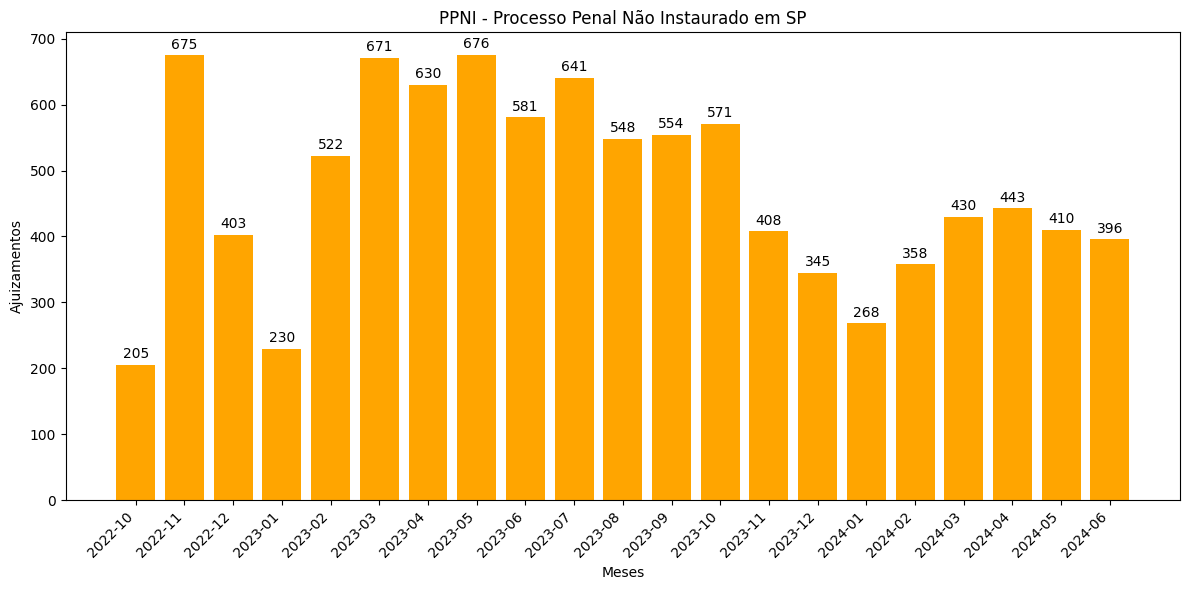

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd # Import pandas to work with dataframes

# Certifique-se de que 'df_anpp' é o DataFrame que contém seus dados
# e que 'data_ajuizamento' é a coluna com as datas
if 'df_anpp' not in locals():
    print("Erro: O DataFrame 'df_anpp' não foi encontrado. Certifique-se de que ele foi criado e populado corretamente.")
else:
    # Convert 'data_ajuizamento' to datetime objects if it's not already
    df_anpp['data_ajuizamento'] = pd.to_datetime(df_anpp['data_ajuizamento'])

    # Extraia os meses da coluna 'data_ajuizamento'
    df_anpp['month'] = df_anpp['data_ajuizamento'].dt.strftime('%Y-%m')

    # Conte os ajuizamentos por mês
    monthly_counts = df_anpp['month'].value_counts().sort_index()

    # Atribua os meses e as contagens a x e y
    x = monthly_counts.index
    y = monthly_counts.values

    plt.figure(figsize=(12, 6))
    plt.bar(x, y, color='orange')

    plt.xlabel('Meses')
    plt.ylabel('Ajuizamentos')
    plt.title('PPNI - Processo Penal Não Instaurado em SP')
    plt.xticks(rotation=45,ha='right')

    for i in range(len(x)):
        plt.text(x=x[i], y=y[i]+10, s=str(y[i]), ha='center')

    plt.tight_layout()
    plt.savefig('n_ajuizamentos_anpp.jpg')
    plt.show()

In [ ]:
top_100 = df_anpp.groupby(['municipio', 'orgao_julgador'])['codigo'].count().sort_values(ascending=False).head(100)
with open('top_100_ajuizamentos_anpp.txt', 'w') as file:
    for index, value in top_100.items():
        texto = f"{index[0]} | {index[1]} |{value}"
        file.write(texto + '\n')
        print(texto)

3549904.0 | JURI/EXECUCOES DE SAO JOSE DOS CAMPOS |278
3554102.0 | 01 EXECUCOES CRIMINAIS DE TAUBATE |229
3554102.0 | 02 EXECUCOES CRIMINAIS DE TAUBATE |171
3548807.0 | 02 CRIMINAL DE SAO CAETANO DO SUL |167
3548500.0 | JURI/EXECUCOES DE SANTOS |145
3510500.0 | CRIMINAL DE CARAGUATATUBA |143
3551009.0 | EXECUCOES CRIMINAIS DE SAO VICENTE |132
3506003.0 | 02 EXECUCOES CRIMINAIS DE BAURU |99
3516408.0 | JURI/EXEC./INF.JUV. DE FRANCO DA ROCHA |92
3507506.0 | 02 CRIMINAL DE BOTUCATU |76
3552205.0 | JURI/EXECUCOES DE SOROCABA |75
3550704.0 | CRIMINAL DE SAO SEBASTIAO |73
3529005.0 | EXECUCOES CRIMINAIS DE MARILIA |72
3547809.0 | JURI/EXECUCOES DE SANTO ANDRE |71
3548708.0 | JURI/EXECUCOES DE SAO BERNARDO DO CAMPO |69
3534708.0 | 01 CRIMINAL DE OURINHOS |68
3554003.0 | 02 CRIMINAL DE TATUI |66
3501608.0 | JURI/EXEC./INF.JUV. DE AMERICANA |63
3527207.0 | CRIMINAL DE LORENA |61
3550308.0 | 05 EXECUCOES CRIMINAIS DE CENTRAL |51
3525904.0 | JURI/EXEC./INF.JUV. DE JUNDIAI |50
3555406.0 | 02 CUMUL